In [12]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [13]:
year = 2024

SA_lon_min, SA_lon_max, SA_lat_min, SA_lat_max = -83,-33,-55,6

In [14]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','OBS_CPTEC','1hr')

## Read raw data

In [15]:
list_files = glob.glob(os.path.join(dir_base,str(year),'raw','*.txt'))
list_files = sorted(list_files)
list_len = len(list_files)
print(f'Number of files: {list_len}')

Number of files: 12


In [16]:
filename = os.path.join(dir_base,list_files[-1])
DATA = pd.read_csv(filename,skiprows=2,skipfooter=3,sep=' ',engine='python')
DATA = DATA[(DATA.lon>-83)&(DATA.lon<-33)&(DATA.lat>=-55)&(DATA.lat<=6)]
DATA.reset_index(drop=True,inplace=False)
DATA.head(3)

,code,lon,lat,alt,date,r
0,14540000,-60.4706,4.6306,0,2024120100,0.0
1,140070401A,-60.1630,4.5945,-9999,2024120100,0.0
2,14530000,-60.7939,4.1961,0,2024120100,0.0


In [7]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Export figure to: ../../images/SA/Raingauges_2024.png


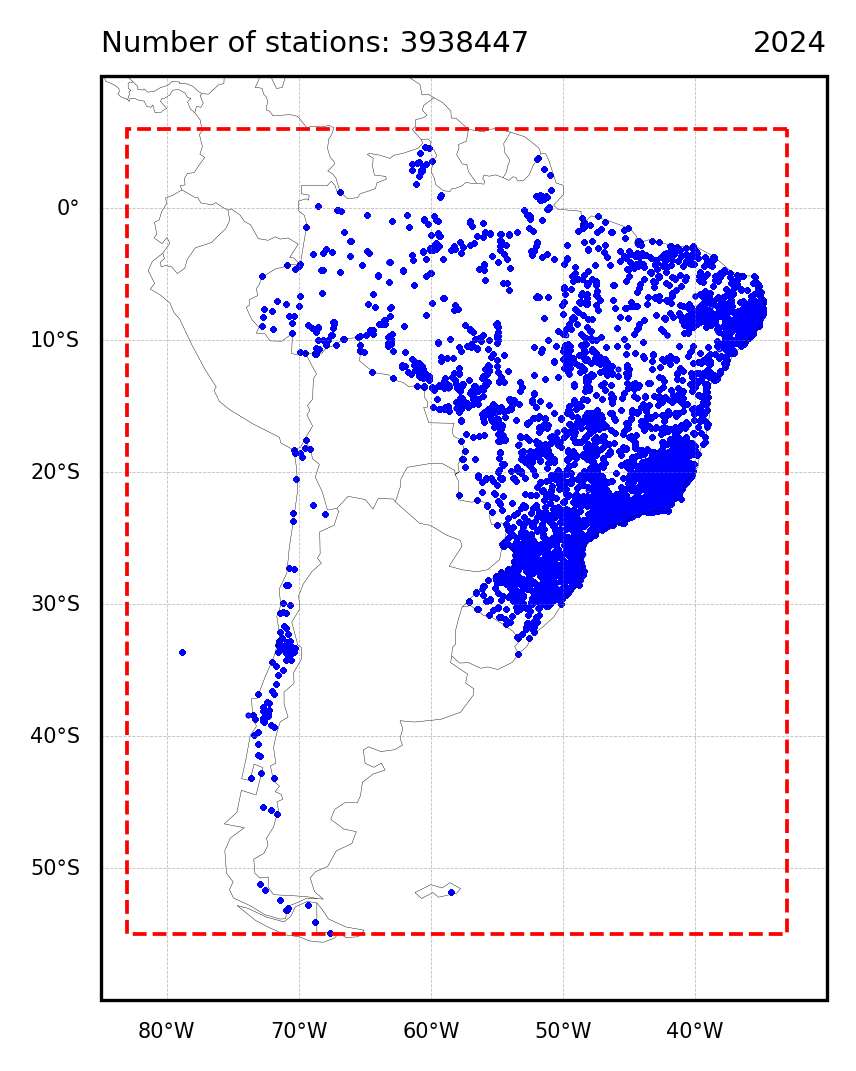

In [13]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-85, -30, -60, 10],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.add_patch(patches.Rectangle((SA_lon_max,SA_lat_max),SA_lon_min-SA_lon_max,SA_lat_min-SA_lat_max,linestyle='--',linewidth=0.9,edgecolor='r',facecolor='None',zorder=5))

ax1.scatter(DATA['lon'],DATA['lat'],s=0.6,marker='.',color='b',transform=proj)

ax1.set_title(f'Number of stations: {len(DATA)}', loc='left', fontsize=7)
ax1.set_title(year, loc='right', fontsize=7)

salida = os.path.join('..','..','images','SA',f'Raingauges_{year}.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [14]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Extract and Create Individual Files

In [8]:
code_list = DATA['code'].values 
code_unique = np.unique(code_list)
print(f'Year    : {year}')
print(f'Stations: {len(code_unique)}')

Year    : 2024
Stations: 6022


In [ ]:
for pos in range(len(code_unique)):
    print(f'Station: {code_unique[pos]}')
    df_list = []

    nameout = f'obs_cptec_{code_unique[pos]}.csv'
    dir_out = os.path.join(dir_base,str(year),'clear',nameout)

    if os.path.exists(dir_out):
            continue
    else:
        for nn in range(list_len):
            filename = os.path.join(dir_base,list_files[nn])
            DATA = pd.read_csv(filename,skiprows=2,skipfooter=3,sep=' ',engine='python')
            DATA_ref = DATA[DATA['code']==code_unique[pos]]
            if not DATA_ref.empty:
                df_list.append(DATA_ref)

    DATA_all = pd.concat(df_list, ignore_index=True)
    DATA_all['date'] = pd.to_datetime(DATA_all['date'].astype(str), format='%Y%m%d%H')
    DATA_all.to_csv(dir_out, header=True, index=False)

Station: -9999
Station: 02042051
Station: 02142096
Station: 1
Station: 10
Station: 10100000
Station: 10200000
Station: 10500000
Station: 10910000
Station: 11
Station: 110018901A
Station: 110020501A
Station: 110020502A
Station: 11400000
Station: 11500000
Station: 120
Station: 120010401A
Station: 120040101H
Station: 120070801A
Station: 121
Station: 12100000
Station: 122
Station: 12240000
Station: 123
Station: 12351000
Station: 12370000
Station: 12390000
Station: 124
Station: 125
Station: 12500000
Station: 12510500
Station: 12520000
Station: 12540000
Station: 12550000
Station: 12557000
Station: 12590000
Station: 126
Station: 12640000
Station: 12650000
Station: 12680000
Station: 127


## Complete dates

In [ ]:
TIME_REF = pd.date_range(start=f'2024-01-01', end=f'2024-12-31', freq='1h')
TIME_PD = pd.DataFrame({'date':TIME_REF})
print(f'Number of times: {len(TIME_PD)}')